In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
df = pd.read_csv("/content/drive/My Drive/BTT - G&M1A/G&M/processed_data files/companies_feature_engineering.csv")
df.head()

,id,name,normalized_name,category_code,status,closed_at,domain,homepage_url,twitter_username,logo_url,...,days_since_last_milestone,funding_frequency,milestone_frequency,recently_funded,recently_milestone,recently_updated,business_maturity_score,ecosystem_engagement,strategic_positioning,operational_sophistication
0,c:1,Wetpaint,wetpaint,web,operating,NaN,wetpaint-inc.com,http://wetpaint-inc.com,BachelrWetpaint,http://s3.amazonaws.com/crunchbase_prod_assets...,...,4409.0,0.826202,1.238765,0,0,0,0.305384,0.504170,8.380819,0.8
1,c:10,Flektor,flektor,games_video,acquired,NaN,flektor.com,http://www.flektor.com,NaN,http://s3.amazonaws.com/crunchbase_prod_assets...,...,6352.0,0.000000,0.000000,0,0,0,0.208033,0.401472,0.350368,0.7
2,c:100,There,there,games_video,acquired,NaN,there.com,http://www.there.com,NaN,http://s3.amazonaws.com/crunchbase_prod_assets...,...,5135.0,0.000000,0.414909,0,0,0,0.241637,0.402944,0.390736,0.7
3,c:10000,MYWEBBO,mywebbo,network_hosting,operating,NaN,mywebbo.com,http://www.mywebbo.com,NaN,NaN,...,6246.0,0.000000,0.000000,0,0,0,0.157581,0.400000,0.275000,0.7
4,c:10001,THE Movie Streamer,the movie streamer,games_video,operating,NaN,themoviestreamer.com,http://themoviestreamer.com,NaN,http://s3.amazonaws.com/crunchbase_prod_assets...,...,6246.0,0.000000,0.000000,0,0,0,0.221530,0.400000,0.350000,0.7


In [5]:
# keep risk tiers in right order for all charts
df['risk_tier_label'] = pd.Categorical(df['risk_tier_label'], categories=['low_risk','medium_risk','high_risk'], ordered=True)

# Set category order for funding stages
funding_order = [
    'Pre-seed', 'Seed', 'Early', 'Growth', 'Late',
    'Exit (IPO)', 'Exit (Acquired)', 'Closed'
]
df['funding_stage'] = pd.Categorical(df['funding_stage'], categories=funding_order, ordered=True)

# Risk Tier Distribution

/tmp/ipython-input-4016191801.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='risk_tier_label', data=df, palette="Blues_r")


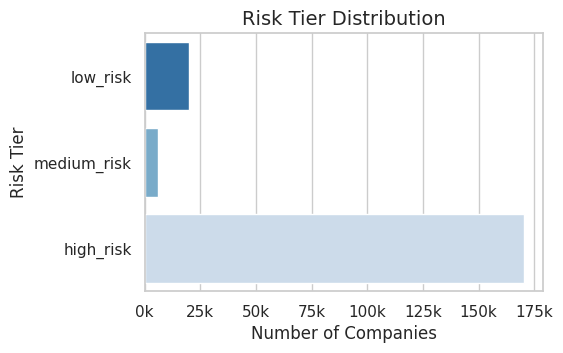

In [5]:
sns.set(style="whitegrid")

plt.figure(figsize=(6,4))
sns.countplot(y='risk_tier_label', data=df, palette="Blues_r")

plt.title("Risk Tier Distribution", fontsize=14)
plt.xlabel("Number of Companies", fontsize=12)
plt.ylabel("Risk Tier", fontsize=12)

# make x-axis labels shorter
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x/1000)}k'))

plt.tight_layout(pad=2.0)
plt.show()

Most companies fall into the high-risk group, while only a small number are medium or low risk. This shows that most startups in the dataset appear financially vulnerable or less established based on our risk scoring

# Company Status Distribution

/tmp/ipython-input-1978677077.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


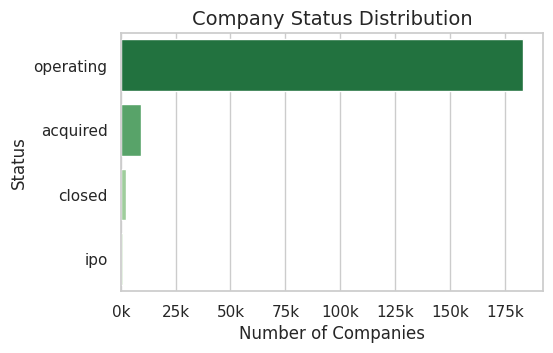

In [6]:
plt.figure(figsize=(6,4))
sns.countplot(
    y='status',
    data=df,
    palette="Greens_r"
)

plt.title("Company Status Distribution", fontsize=14)
plt.xlabel("Number of Companies", fontsize=12)
plt.ylabel("Status", fontsize=12)

# shorten x-axis numbers
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x/1000)}k'))

plt.tight_layout(pad=2.0)
plt.show()


Most companies are still operating, while only a few have been acquired, gone public, or closed. This means most startups in the dataset are still active and haven’t yet reached a final outcome.

# Funding Distribution

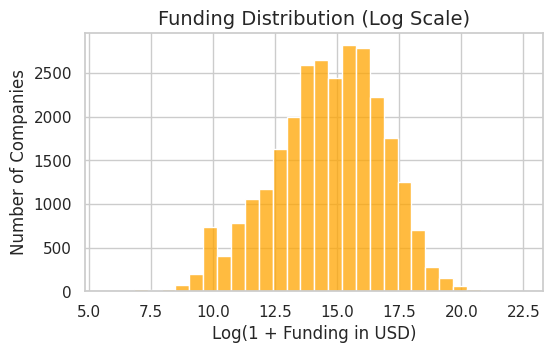

In [7]:
# convert to numeric and remove missing/zero
funding_data = pd.to_numeric(df['funding_total_usd'], errors='coerce')
funding_data = funding_data[funding_data > 0]

# plot histogram
plt.figure(figsize=(6,4))
sns.histplot(np.log1p(funding_data), bins=30, color='orange')

plt.title("Funding Distribution (Log Scale)", fontsize=14)
plt.xlabel("Log(1 + Funding in USD)", fontsize=12)
plt.ylabel("Number of Companies", fontsize=12)

plt.tight_layout(pad=2.0)
plt.show()

Most companies in our dataset raised a medium amount of funding. Only a small number raised very large amounts, which shows that big funding rounds are rare.

# Company Age Distribution

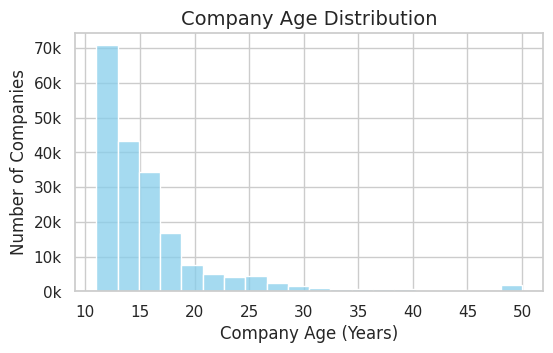

In [8]:
plt.figure(figsize=(6,4))
sns.histplot(df['company_age_years'].dropna(), bins=20, color='skyblue')

plt.title("Company Age Distribution", fontsize=14)
plt.xlabel("Company Age (Years)", fontsize=12)
plt.ylabel("Number of Companies", fontsize=12)

# Shorten the y-axis
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{int(y/1000)}k'))

plt.tight_layout(pad=2.0)
plt.show()

Most companies are relatively young. The age distribution is right-skewed, meaning many younger firms and fewer older ones

#Funding by Risk Tier

/tmp/ipython-input-2507990486.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


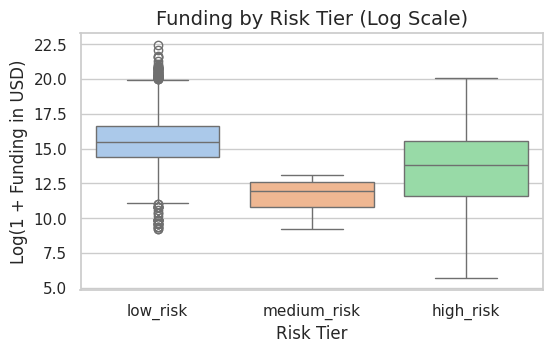

In [10]:
# keep only rows with funding > 0 so the log works
funding_risk = df[df['funding_total_usd'] > 0]

plt.figure(figsize=(6,4))
sns.boxplot(
    x='risk_tier_label',
    y=np.log1p(funding_risk['funding_total_usd']),
    data=funding_risk,
    palette="pastel"
)

plt.title("Funding by Risk Tier (Log Scale)", fontsize=14)
plt.xlabel("Risk Tier", fontsize=12)
plt.ylabel("Log(1 + Funding in USD)", fontsize=12)

plt.tight_layout(pad=2.0)
plt.show()

This chart shows that low-risk companies usually have higher funding, while medium-risk ones have much less. High-risk companies vary more in how much money they have, with some getting very little and a few raising large amounts. Overall, this suggests that companies with more funding tend to be safer, while those with little money are more likely to be risky.

# Risk by Company Age Group

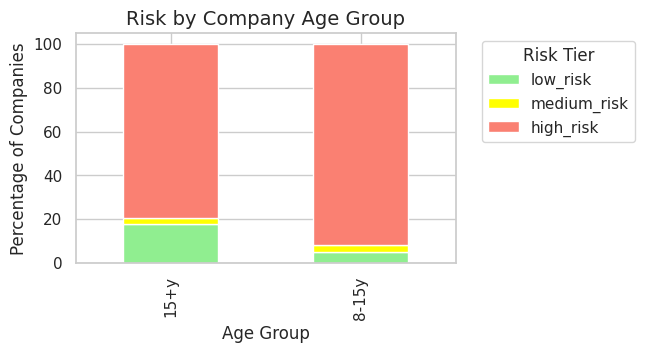

In [11]:
age_risk = pd.crosstab(df['age_group'], df['risk_tier_label'], normalize='index') * 100

# make stacked bar chart
age_risk.plot(kind='bar', stacked=True, figsize=(7,4),
              color=['lightgreen', 'yellow', 'salmon'])

plt.title("Risk by Company Age Group", fontsize=14)
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Percentage of Companies", fontsize=12)

plt.legend(title="Risk Tier", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout(pad=2.0)
plt.show()


Both the 8–15 year and 15+ year companies are mostly high risk, but the 15+ group has a bit more low-risk firms than the 8–15 group. This suggests that while many older companies still face high risk, a few long-standing ones have become more stable over time.

# Top 10 Industries by High-Risk Share

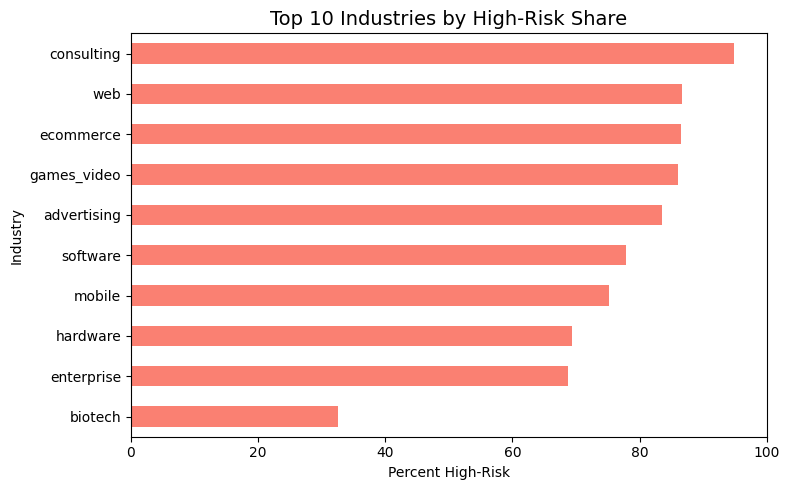

In [15]:
# Top 10 industries
top_industries = (
    df.loc[df['category_code']!='other','category_code']
      .value_counts().head(10).index
)

# Calculate % of high-risk firms per industry
pct_high = (
    pd.crosstab(df['category_code'], df['risk_tier_label'], normalize='index') * 100
).loc[top_industries]['high_risk'].sort_values(ascending=True)

# Plot
plt.figure(figsize=(8,5))
pct_high.plot(kind='barh', color='salmon')

plt.title('Top 10 Industries by High-Risk Share', fontsize=14)
plt.xlabel('Percent High-Risk')
plt.ylabel('Industry')
plt.xlim(0, 100)
plt.tight_layout()
plt.show()

Among the industries in our data, these ten have the highest share of high-risk companies.

# Top 10 High-Risk States

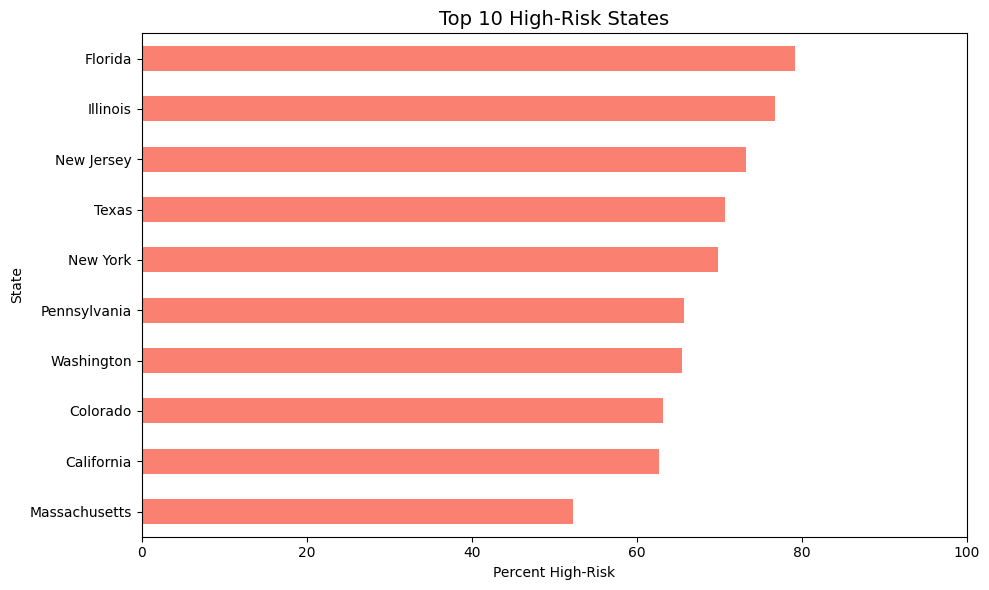

In [13]:
# keep only usa companies
df_us = df[df['country_code'] == 'usa'].copy()

# make state codes lowercase
df_us['state_code'] = df_us['state_code'].str.lower()

# convert state codes to names
state_map = {
    'fl': 'Florida',
    'il': 'Illinois',
    'nj': 'New Jersey',
    'tx': 'Texas',
    'ny': 'New York',
    'pa': 'Pennsylvania',
    'wa': 'Washington',
    'co': 'Colorado',
    'ca': 'California',
    'ma': 'Massachusetts'
}

df_us['state_label'] = df_us['state_code'].map(state_map).fillna(df_us['state_code'])

# top 10 states
top_states = df_us['state_label'].value_counts().head(10).index

#  % high-risk per top 10
pct_high_state = (
    pd.crosstab(df_us['state_label'], df_us['risk_tier_label'], normalize='index') * 100
).loc[top_states, 'high_risk'].sort_values(ascending=True)


plt.figure(figsize=(10,6))
pct_high_state.plot(kind='barh', color='salmon')

plt.title('Top 10 High-Risk States', fontsize=14)
plt.xlabel('Percent High-Risk'); plt.ylabel('State')
plt.xlim(0, 100)
plt.tight_layout()
plt.show()

Within the U.S. sample, these ten states have the highest share of high-risk companies.